# Basic Data: 
The basic data can be fetched from the [NSE Website](https://www.nseindia.com/reports-indices-historical-index-data). 

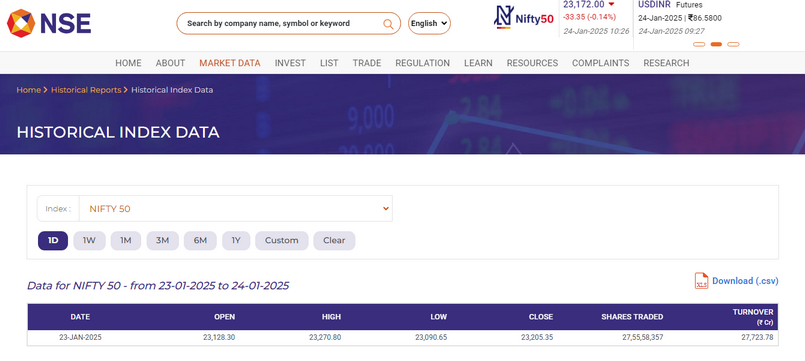

In [1]:
import requests as rq
import pandas as pd
import numpy as np 
import json 
import time 
import datetime

## Part-1: Testing mechanism: 

### 1.1 Initialize variables: 

In [2]:
# Home Page
url1 = "https://www.nseindia.com/reports-indices-historical-index-data"
# Specify From Date and To Date : 
from_date = "01-01-2024"
to_date   = "07-01-2024"

url2 = "https://www.nseindia.com/api/historical/indicesHistory?indexType=NIFTY%2050&from="+from_date+"&to="+to_date

print(url2)

https://www.nseindia.com/api/historical/indicesHistory?indexType=NIFTY%2050&from=01-01-2024&to=07-01-2024


### 1.2 Load Home Page and parse cookies: 

In [3]:
# Create Session Object
session = rq.Session()

main_headers = {
    "Dnt": "1",
    "sec-ch-ua": '"Google Chrome";v="131", "Chromium";v="131", "Not_A Brand";v="24"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": '"Windows"',
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "none",
    "sec-fetch-user": "?1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"
}

response1 = session.get(url1,headers=main_headers)

print(response1.status_code)

# Parse the Cookies from Home Page: 

home_page_cookies = response1.cookies.get_dict()
cookie_header = {"Cookie": "; ".join([f"{key}={value}" for key, value in home_page_cookies.items()])}

# Merge Cookies with Main Header: 

new_header_with_cookies =  main_headers | cookie_header
print("Header Keys: ", new_header_with_cookies.keys())


200
Header Keys:  dict_keys(['Dnt', 'sec-ch-ua', 'sec-ch-ua-mobile', 'sec-ch-ua-platform', 'sec-fetch-dest', 'sec-fetch-mode', 'sec-fetch-site', 'sec-fetch-user', 'upgrade-insecure-requests', 'user-agent', 'Cookie'])


### 1.3 Fetch data from hidden API: 
There are two dataframes presnet in the data. 

In [4]:
# Finally, invoke API Request
response2 = session.get(url2,headers=new_header_with_cookies)
print(response2.status_code)
json_data = response2.json()
df_indexCloseOnlineRecords = pd.DataFrame(json_data.get('data').get('indexCloseOnlineRecords'))
#df_indexCloseOnlineRecords.head()
df_indexTurnoverRecords = pd.DataFrame(json_data.get('data').get('indexTurnoverRecords'))
#df_indexTurnoverRecords.head()

200


### 1.4 Check Index Open-Close-High data:  

In [5]:
df_indexCloseOnlineRecords.head()

,_id,EOD_INDEX_NAME,EOD_OPEN_INDEX_VAL,EOD_HIGH_INDEX_VAL,EOD_CLOSE_INDEX_VAL,EOD_LOW_INDEX_VAL,EOD_TIMESTAMP,TIMESTAMP
0,6592aa701f3097105c5a23b5,NIFTY 50,21727.75,21834.35,21741.90,21680.85,01-JAN-2024,2023-12-31T18:30:00.000Z
1,6593fae2c4132a5d6c53f794,NIFTY 50,21751.35,21755.60,21665.80,21555.65,02-JAN-2024,2024-01-01T18:30:00.000Z
2,65954d6d0920b679ebe5a39b,NIFTY 50,21661.10,21677.00,21517.35,21500.35,03-JAN-2024,2024-01-02T18:30:00.000Z
3,65969eed8bc6e5de3cccf192,NIFTY 50,21605.80,21685.65,21658.60,21564.55,04-JAN-2024,2024-01-03T18:30:00.000Z
4,6597ef5a81dced1976cdcfe7,NIFTY 50,21705.75,21749.60,21710.80,21629.20,05-JAN-2024,2024-01-04T18:30:00.000Z


### 1.5 Check Index Volume data:  

In [6]:
df_indexTurnoverRecords.head()

,_id,HIT_INDEX_NAME_UPPER,HIT_TRADED_QTY,HIT_TURN_OVER,HIT_TIMESTAMP,TIMESTAMP
0,6592c7ba1f3097105c5a2e4a,NIFTY 50,153995217,14184.09,01-01-2024,2023-12-31T18:30:00.000Z
1,65940dfac4132a5d6c540841,NIFTY 50,263711568,25316.13,02-01-2024,2024-01-01T18:30:00.000Z
2,659563d00920b679ebe5b1c2,NIFTY 50,311933117,32329.23,03-01-2024,2024-01-02T18:30:00.000Z
3,6596b5518bc6e5de3cccfbf9,NIFTY 50,339172697,30868.15,04-01-2024,2024-01-03T18:30:00.000Z
4,6598090a81dced1976cde30c,NIFTY 50,309303266,26554.49,05-01-2024,2024-01-04T18:30:00.000Z


## Part-2: Scaling: 

### 2.1 Generate Year list:

In [18]:
start_year = 2000
end_year   = 2025

fetch_list = []
year_list = list(range(start_year,end_year+1))
#print(year_list)

for y in year_list:
    start_date = "01-01-"+str(y)
    end_date   = "31-12-"+str(y)
    year_bound = {
        "start_date" : start_date,
        "end_date" : end_date
    }
    fetch_list.append(year_bound)


for bound in fetch_list: 
    print(bound)

{'start_date': '01-01-2000', 'end_date': '31-12-2000'}
{'start_date': '01-01-2001', 'end_date': '31-12-2001'}
{'start_date': '01-01-2002', 'end_date': '31-12-2002'}
{'start_date': '01-01-2003', 'end_date': '31-12-2003'}
{'start_date': '01-01-2004', 'end_date': '31-12-2004'}
{'start_date': '01-01-2005', 'end_date': '31-12-2005'}
{'start_date': '01-01-2006', 'end_date': '31-12-2006'}
{'start_date': '01-01-2007', 'end_date': '31-12-2007'}
{'start_date': '01-01-2008', 'end_date': '31-12-2008'}
{'start_date': '01-01-2009', 'end_date': '31-12-2009'}
{'start_date': '01-01-2010', 'end_date': '31-12-2010'}
{'start_date': '01-01-2011', 'end_date': '31-12-2011'}
{'start_date': '01-01-2012', 'end_date': '31-12-2012'}
{'start_date': '01-01-2013', 'end_date': '31-12-2013'}
{'start_date': '01-01-2014', 'end_date': '31-12-2014'}
{'start_date': '01-01-2015', 'end_date': '31-12-2015'}
{'start_date': '01-01-2016', 'end_date': '31-12-2016'}
{'start_date': '01-01-2017', 'end_date': '31-12-2017'}
{'start_da

### 2.2 Load Home Page with cookies:

In [19]:
# This snippet is responsible for fething the cookies from home page 
home_page_headers = {
    "Dnt": "1",
    "sec-ch-ua": '"Google Chrome";v="131", "Chromium";v="131", "Not_A Brand";v="24"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": '"Windows"',
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "none",
    "sec-fetch-user": "?1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"
}

home_page_url = "https://www.nseindia.com/reports-indices-historical-index-data"

session = rq.Session()

home_page_response = session.get(home_page_url,headers=home_page_headers)

home_page_cookies = {}
new_header_with_cookies = {}

if home_page_response.status_code == 200: 
    print("Home Page loaded successfully.")
    home_page_cookies = home_page_response.cookies.get_dict()
    cookie_header = {"Cookie": "; ".join([f"{key}={value}" for key, value in home_page_cookies.items()])}
    print("Parsed cookies successfully.")
    new_header_with_cookies =  home_page_headers | cookie_header
    print("Number of Keys in new header with cookies: ", len(new_header_with_cookies.keys()))
else: 
    print("Home Page load failed.")
    print("Unable to get cookies. Subsequent requests might fail.")
    

Home Page loaded successfully.
Parsed cookies successfully.
Number of Keys in new header with cookies:  11


### 2.3 Fetch Data from hidden NSE API:

In [20]:
df_indexCloseOnlineRecords = pd.DataFrame({})
df_indexTurnoverRecords    = pd.DataFrame({})

# E.g.: https://www.nseindia.com/api/historical/indicesHistory?indexType=NIFTY%2050&from=01-01-2024&to=07-01-2024
nse_hidden_api_url = "" 
api_response       = ""
json_data          = "[]"

# Start the loop : load all json data 
for bound in fetch_list: 
    start_date = bound.get("start_date")
    end_date = bound.get("end_date")
    
    # invoke API Request
    nse_hidden_api_url = "https://www.nseindia.com/api/historical/indicesHistory?indexType=NIFTY%2050&from="+start_date+"&to="+end_date 
    api_response = session.get(nse_hidden_api_url,headers=new_header_with_cookies)
    
    time.sleep(1) # Dont overwhelm API, might get blocked

    if api_response.status_code == 200: 
        print("API Fetch successful for: ",bound)
        json_data = api_response.json()
        temp_df1 = pd.DataFrame(json_data.get('data').get('indexCloseOnlineRecords'))
        temp_df2 = pd.DataFrame(json_data.get('data').get('indexTurnoverRecords'))
        df_indexCloseOnlineRecords = pd.concat([df_indexCloseOnlineRecords, temp_df1])
        df_indexTurnoverRecords = pd.concat([df_indexTurnoverRecords, temp_df2])
    else:
        print("API Fetch failed for: ",bound,". Data will be missed!")

print("Finished fetching data.")


API Fetch successful for:  {'start_date': '01-01-2000', 'end_date': '31-12-2000'}
API Fetch successful for:  {'start_date': '01-01-2001', 'end_date': '31-12-2001'}
API Fetch successful for:  {'start_date': '01-01-2002', 'end_date': '31-12-2002'}
API Fetch successful for:  {'start_date': '01-01-2003', 'end_date': '31-12-2003'}
API Fetch successful for:  {'start_date': '01-01-2004', 'end_date': '31-12-2004'}
API Fetch successful for:  {'start_date': '01-01-2005', 'end_date': '31-12-2005'}
API Fetch successful for:  {'start_date': '01-01-2006', 'end_date': '31-12-2006'}
API Fetch successful for:  {'start_date': '01-01-2007', 'end_date': '31-12-2007'}
API Fetch successful for:  {'start_date': '01-01-2008', 'end_date': '31-12-2008'}
API Fetch successful for:  {'start_date': '01-01-2009', 'end_date': '31-12-2009'}
API Fetch successful for:  {'start_date': '01-01-2010', 'end_date': '31-12-2010'}
API Fetch successful for:  {'start_date': '01-01-2011', 'end_date': '31-12-2011'}
API Fetch succes

## Part-3: Merge, clean and save data:  

### 3.1 Merge Data: 

In [21]:
df_indexCloseOnlineRecords.describe()

,EOD_OPEN_INDEX_VAL,EOD_HIGH_INDEX_VAL,EOD_CLOSE_INDEX_VAL,EOD_LOW_INDEX_VAL
count,2997.000000,2997.000000,2997.000000,2997.000000
mean,12462.630764,12520.210511,12453.494811,12384.418769
std,5304.976151,5324.180424,5302.218156,5278.585727
min,5233.450000,5317.700000,5285.000000,5118.850000
25%,8285.500000,8332.600000,8285.600000,8233.250000
50%,10808.450000,10838.050000,10793.650000,10739.400000
75%,17079.500000,17182.500000,17069.100000,16942.350000
max,26248.250000,26277.350000,26216.050000,26151.400000


In [22]:
df_indexTurnoverRecords.describe()

,HIT_TRADED_QTY,HIT_TURN_OVER
count,2.984000e+03,2984.000000
mean,3.001630e+08,17741.999152
std,1.858633e+08,11119.512729
min,7.991165e+06,355.740000
25%,1.770046e+08,8231.472500
50%,2.441547e+08,15771.030000
75%,3.549689e+08,24623.812500
max,1.811564e+09,93786.440000


In [23]:
df_merged = pd.merge(df_indexCloseOnlineRecords, df_indexTurnoverRecords, how='outer', on='TIMESTAMP')
df_merged.head()

In [24]:
df_merged.describe()

,EOD_OPEN_INDEX_VAL,EOD_HIGH_INDEX_VAL,EOD_CLOSE_INDEX_VAL,EOD_LOW_INDEX_VAL,HIT_TRADED_QTY,HIT_TURN_OVER
count,2997.000000,2997.000000,2997.000000,2997.000000,2.992000e+03,2992.000000
mean,12462.630764,12520.210511,12453.494811,12384.418769,3.001129e+08,17772.133533
std,5304.976151,5324.180424,5302.218156,5278.585727,1.856362e+08,11123.655293
min,5233.450000,5317.700000,5285.000000,5118.850000,7.991165e+06,355.740000
25%,8285.500000,8332.600000,8285.600000,8233.250000,1.771680e+08,8244.280000
50%,10808.450000,10838.050000,10793.650000,10739.400000,2.443531e+08,15849.960000
75%,17079.500000,17182.500000,17069.100000,16942.350000,3.548264e+08,24718.990000
max,26248.250000,26277.350000,26216.050000,26151.400000,1.811564e+09,93786.440000


### 3.2 Save raw data: 

In [25]:
output_path = "data/"
curr_timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Eg: data/basic-data-20250124-103640-raw.csv 
raw_file_name = output_path + "basic-data-" + curr_timestamp + "-raw.csv"

df_merged.to_csv(raw_file_name, sep=',', encoding='utf-8', index=False, header=True)


In [26]:
df_merged.head()

,_id_x,EOD_INDEX_NAME,EOD_OPEN_INDEX_VAL,EOD_HIGH_INDEX_VAL,EOD_CLOSE_INDEX_VAL,EOD_LOW_INDEX_VAL,EOD_TIMESTAMP,TIMESTAMP,_id_y,HIT_INDEX_NAME_UPPER,HIT_TRADED_QTY,HIT_TURN_OVER,HIT_TIMESTAMP
0,64996b303c4faf0007f06992,NIFTY 50,5937.65,5963.90,5950.85,5935.20,01-JAN-2013,2012-12-31T18:30:00.000Z,6499e007651b8f0006a1fb9b,NIFTY 50,77902745.0,3298.74,01-01-2013
1,64996b3a583df60007d9b8aa,NIFTY 50,5982.60,6006.05,5993.25,5982.00,02-JAN-2013,2013-01-01T18:30:00.000Z,6499c0ec20257400068ad80f,NIFTY 50,116057389.0,4992.90,02-01-2013
2,64996b44c504a400073793c3,NIFTY 50,6015.80,6017.00,6009.50,5986.55,03-JAN-2013,2013-01-02T18:30:00.000Z,6499c0f10292910007ab44f0,NIFTY 50,99989933.0,4883.13,03-01-2013
3,64996b4e7f346a00085d3b11,NIFTY 50,6011.95,6020.75,6016.15,5981.55,04-JAN-2013,2013-01-03T18:30:00.000Z,6499c0f6a2dba60007b88fe6,NIFTY 50,113232990.0,5191.38,04-01-2013
4,64996b580715db000745550d,NIFTY 50,6042.15,6042.15,5988.40,5977.15,07-JAN-2013,2013-01-06T18:30:00.000Z,6499c0fbf4931e00079216b7,NIFTY 50,110248018.0,5093.62,07-01-2013


### 3.3 Clean raw data: 

In [27]:
# Create Copy of Raw Data: 
df2 = df_merged.copy()

# Remove unnecessary columns
df2 = df2.drop(columns=['_id_x', 'EOD_INDEX_NAME', 'TIMESTAMP', '_id_y', 'HIT_INDEX_NAME_UPPER', 'HIT_TIMESTAMP'])

# Rename Columns with read-friendly names: 

col_rename_map = {'EOD_OPEN_INDEX_VAL' : 'Open', 
                  'EOD_HIGH_INDEX_VAL' : 'High',
                  'EOD_CLOSE_INDEX_VAL' : 'Close',
                  'EOD_LOW_INDEX_VAL' : 'Low',
                  'HIT_TRADED_QTY' : 'Shares Traded Qty',
                  'HIT_TURN_OVER' : 'Turnover Rs In Cr',
                  'EOD_TIMESTAMP' : 'Trading Date'
                 }
df2.rename(col_rename_map, axis=1, inplace=True)

# Reorder the columns: 

df2 = df2[['Trading Date','Open', 'High', 'Low', 'Close','Shares Traded Qty','Turnover Rs In Cr']]

#df2.columns
df2.head()

,Trading Date,Open,High,Low,Close,Shares Traded Qty,Turnover Rs In Cr
0,01-JAN-2013,5937.65,5963.90,5935.20,5950.85,77902745.0,3298.74
1,02-JAN-2013,5982.60,6006.05,5982.00,5993.25,116057389.0,4992.90
2,03-JAN-2013,6015.80,6017.00,5986.55,6009.50,99989933.0,4883.13
3,04-JAN-2013,6011.95,6020.75,5981.55,6016.15,113232990.0,5191.38
4,07-JAN-2013,6042.15,6042.15,5977.15,5988.40,110248018.0,5093.62


### 3.4 Save cleaned data: 

In [28]:
output_path = "data/"

# Eg: data/basic-data-20250124-103640.csv 
clean_file_name = output_path + "basic-data-" + curr_timestamp + ".csv"

df2.to_csv(clean_file_name, sep=',', encoding='utf-8', index=False, header=True)